## Homework 1 


This homework is done by:ZHENG XIAOYANG 202111030007 @ Beijing Normal University

*背包问题* \\
有以下物品：按照编号重量价值分别为存储为c_j,w_j.
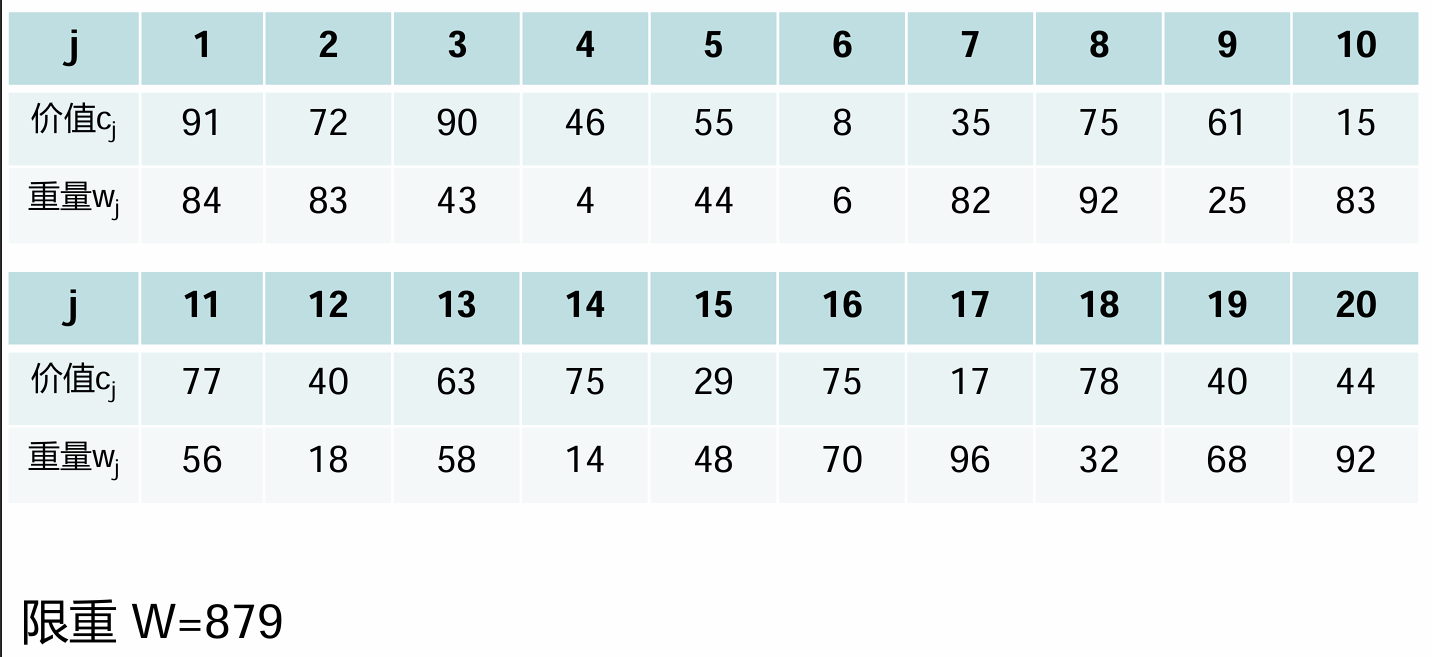

## Initialization
Import nessary packages

In [60]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt

Import data

In [61]:
# Import data of the question
data = {
    'j': list(range(1, 21)),
    'c': [91, 72, 90, 46, 55, 8, 35, 75, 61, 15, 77, 40, 63, 75, 29, 75, 17, 78, 40, 44],
    'w': [84, 83, 43, 4, 44, 6, 82, 92, 25, 83, 56, 18, 58, 14, 48, 70, 96, 32, 68, 92]
}
overWeight = 879

## Part 1：Statical parameter approach

### 1.1 Set parameters and initialize the values

In [62]:

start_time = time.time()
max_generations = 200  # Number of generations
population_size = 100  # Size of the population
mutation_rate = 0.05  # Mutation rate
patience_value = 20  # Patience value
# Data from the DataFrame
values = data['c']
weights = data['w']
num_items = len(values)

### 1.2 Define the all functions in the model

In [63]:
# Fitness function
def fitness(individual):
    total_value = np.dot(individual, values)
    total_weight = np.dot(individual, weights) # Calculate the total value and weight of the solution, using dinary encoding and dot product
    
    if total_weight > overWeight:
        return 0  # Invalid solution; using 0 value to minimize the total value which will directly bypass the solution
    return total_value

# Generate initial population
def generate_population(population_size, num_items):
    return [np.random.randint(2, size=num_items) for _ in range(population_size)]

# Tournament selection
def selection(population):
    tournament_size = 5
    selected = random.sample(population, tournament_size)
    return max(selected, key=fitness)

# Crossover operation (single-point crossover)
def crossover(parent1, parent2):
    point = random.randint(1, num_items - 1)
    child = np.concatenate((parent1[:point], parent2[point:]))
    return child

# Mutation operation
def mutate(individual):
    for i in range(num_items):
        if random.random() < mutation_rate:
            individual[i] = 1 - individual[i]  # Flip bit
    return individual

### 1.3 Generic algorism main function

In [64]:
def genetic_algorithm(Print=True,plot_falg=False):
    population = generate_population(population_size, num_items)
    fitness_record =[]
    for generation in range(max_generations):
        new_population = []
        for _ in range(population_size):
            parent1 = selection(population)
            parent2 = selection(population)
            child = crossover(parent1, parent2)
            child = mutate(child)
            new_population.append(child)
        
        population = new_population

        # Get the best solution in the current population
        best_individual = max(population, key=fitness)
        best_fitness = fitness(best_individual)
        fitness_record.append(best_fitness)
        if generation % 50 == 0 and Print == True:
            print(f"Generation {generation}, Best Fitness: {best_fitness}")
    if plot_falg == True:
        plt.plot(fitness_record)
        plt.xlabel('Generation')
        plt.ylabel('Fitness')
        plt.title('Fitness over Generations')
        plt.show()
    return best_individual, fitness(best_individual)

### 1.4 Run the algorithm

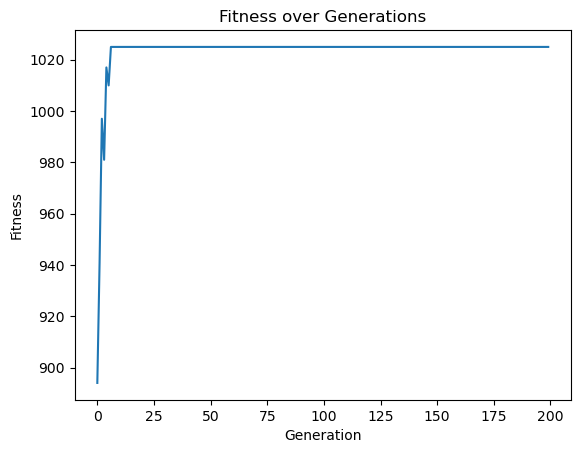

Selected items: [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 16, 18, 19, 20] 
Best value =  1025
Time:  1.350663423538208


In [65]:
start_time = time.time()
best_solution, best_value = genetic_algorithm(Print = False,plot_falg=True)
end_time = time.time()
time_stable = end_time - start_time
selected_items = [data['j'][i] for i in range(num_items) if best_solution[i] == 1]
print('Selected items:',selected_items,'\nBest value = ', best_value)
print("Time: ", time_stable)

## Part 2: Dynamic generation approach

### 2.1 Main function of the dynamic generation approach

In [66]:
# Improved Genetic Algorithm with adaptive stopping
def genetic_algorithm_adaptive(max_generations=500, patience=patience_value,Print = True,plot_flag=False):
    """
    Executes a genetic algorithm with adaptive stopping criteria based on patience.
    Args:
        max_generations (int): The maximum number of generations to run the algorithm. Default is 500.
        patience (int): The number of generations to wait for an improvement in fitness before stopping early. Default is 50.
    Returns:
        tuple: A tuple containing the best solution found and its fitness value.
    The function performs the following steps:
    1. Initializes a population of potential solutions.
    2. Iteratively evolves the population through selection, crossover, and mutation.
    3. Tracks the best solution and its fitness over time.
    4. Stops early if no improvement in fitness is observed for a specified number of generations (`patience`).
    5. Prints progress every 50 generations.
    The algorithm uses the following helper functions (assumed to be defined elsewhere):
    - generate_population(population_size, num_items): Generates the initial population.
    - selection(population): Selects a parent from the population based on fitness.
    - crossover(parent1, parent2): Produces a child solution by combining two parents.
    - mutate(child): Applies mutation to a child solution.
    - fitness(individual): Evaluates the fitness of an individual solution.
    """
    population = generate_population(population_size, num_items)
    best_fitness_over_time = []
    
    best_solution = None
    best_fitness = 0
    generations_without_improvement = 0
    
    for generation in range(max_generations):
        new_population = []
        for _ in range(population_size):
            # Select two parents from the population
            parent1 = selection(population)
            parent2 = selection(population)
            
            # Perform crossover to produce a child
            child = crossover(parent1, parent2)
            
            # Apply mutation to the child
            child = mutate(child)
            
            # Add the child to the new population
            new_population.append(child)
        
        # Replace the old population with the new population
        population = new_population

        # Get the best solution in the current population
        current_best_individual = max(population, key=fitness)
        current_best_fitness = fitness(current_best_individual)
        
        # Track the best solution and fitness
        if current_best_fitness > best_fitness:
            best_fitness = current_best_fitness
            best_solution = current_best_individual
            generations_without_improvement = 0  # Reset the counter if there's an improvement
        else:
            generations_without_improvement += 1  # Increment the counter if no improvement
        
        # Record the best fitness value over time
        best_fitness_over_time.append(best_fitness)
        
        # Print progress every 50 generations
        if generation % 50 == 0 and Print == True:
            print(f"Generation {generation}, Best Fitness: {best_fitness}")

        # Stop early if no improvement for 'patience' generations
        if generations_without_improvement >= patience:
            if Print == True:
                print(f"No improvement for {patience} generations, stopping early at generation {generation}")
            break
    if plot_flag == True:
        plt.plot(best_fitness_over_time)
        plt.xlabel('Generation')
        plt.ylabel('Fitness')
        plt.title('Fitness over Generations')
        plt.show()
    return best_solution, best_fitness

### 2.2 Run the adaptive genetic algorithm

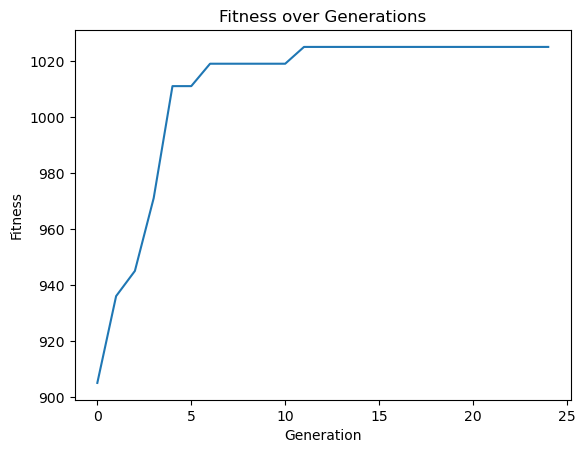

Selected_items: [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 16, 18, 19, 20] 
Best_value =  1025
Time:  0.27100038528442383


In [115]:
# Record the start time of the adaptive genetic algorithm
start_time_adaptive = time.time()

# Run the adaptive genetic algorithm with a patience value of 50
best_solution_adaptive, best_value_adaptive = genetic_algorithm_adaptive(patience=13,Print = False,plot_flag=True)

# Record the end time of the adaptive genetic algorithm
end_time_adaptive = time.time()

# Display the best solution and its value
best_solution_adaptive, best_value_adaptive

# Select the items corresponding to the best solution
selected_items = [data['j'][i] for i in range(num_items) if best_solution_adaptive[i] == 1]
print('Selected_items:',selected_items,'\nBest_value = ' ,best_value_adaptive)

# Calculate and display the time taken to run the adaptive genetic algorithm
time_adaptive = end_time_adaptive - start_time_adaptive
print("Time: ", time_adaptive)

### 2.3 Stablity Test

C:\Users\lanto\AppData\Local\Temp\ipykernel_9624\4039817593.py:11: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (best_value_adaptive != previous and loop != 1):


@ 1   [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 16, 18, 19, 20] 1025 

Time:@  1 = 0.07300424575805664
@ 2   [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 16, 18, 19, 20] 1025 

Time:@  2 = 0.06649494171142578
@ 3   [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 16, 18, 19, 20] 1025 

Time:@  3 = 0.07200050354003906
@ 4   [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 16, 18, 19, 20] 1025 

Time:@  4 = 0.059009552001953125
@ 5   [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 16, 18, 19, 20] 1025 

Time:@  5 = 0.05600309371948242
@ 6   [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 16, 18, 19, 20] 1025 

Time:@  6 = 0.05398726463317871
Unstable!
@ 1   [1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 15, 16, 18, 19, 20] 1019 

Time:@  1 = 0.07800126075744629
@ 2   [1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 15, 16, 18, 19, 20] 1019 

Time:@  2 = 0.0839993953704834
Unstable!
@ 1   [1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 15, 16, 18, 19, 20] 1019 

Time:@  1 = 0.08100104331970215
Unstable!
@ 1   [1, 2, 3, 4, 5, 

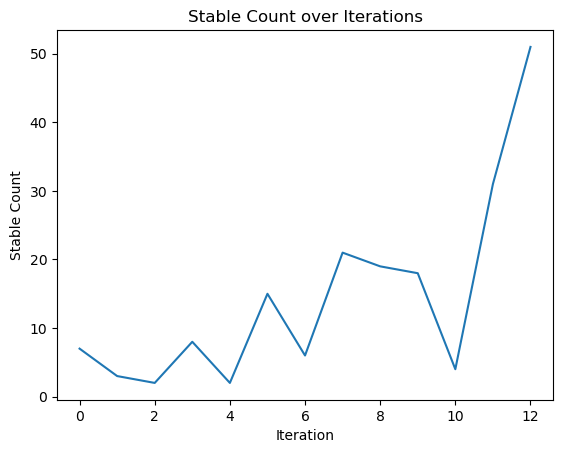

Stable Patience Value:  15


In [114]:
previous = []
unstable_flag = False
initial = True
patience_value = 3
stable_count= []
while unstable_flag == True or initial == True:
    initial = False
    for loop in range(1,52):
        start_time_adaptive = time.time()
        best_solution_adaptive, best_value_adaptive = genetic_algorithm_adaptive(patience=patience_value,Print = False)
        if (best_value_adaptive != previous and loop != 1):
            print('Unstable!')
            patience_value = patience_value + 1
            unstable_flag = True
            break
        previous = best_value_adaptive
        selected_items = [data['j'][i] for i in range(num_items) if best_solution_adaptive[i] == 1]
        print('@',loop,' ',selected_items, best_value_adaptive,'\n')
        end_time_adaptive = time.time()
        time_adaptive = end_time_adaptive - start_time_adaptive
        print("Time:@ ",loop,'=',time_adaptive)
    if loop == 51:
        unstable_flag = False
    stable_count.append(loop)
plt.plot(stable_count)
plt.xlabel('Iteration')
plt.ylabel('Stable Count')
plt.title('Stable Count over Iterations')
plt.show()
print('Stable Patience Value: ',patience_value)

We can see from this result that it's hard to define which patience can be a stable one, but at least we can see that the patience 12 is enouph for a solution making the possibility of a mistake solution less than 0.1%(error rate @ 5%).

## Part 3:  Vote for the best solution

### 3.1 Main function of the vote

In [77]:
def optimize_solution(max_attempts=100, set_patience=patience_value,Print = True):
    attempts = 0
    results = {}
    best_fitness_over_time = []
    while attempts < max_attempts:
        best_solution_adaptive, best_value_adaptive = genetic_algorithm_adaptive(patience=set_patience)
        
        if best_value_adaptive in results:
            results[best_value_adaptive].append(best_solution_adaptive)
        else:
            results[best_value_adaptive] = [best_solution_adaptive]
        
        for value, solutions in results.items():
            if len(solutions) >= 2:
                return solutions[0], solutions[1], value
        best_fitness_over_time.append(best_value_adaptive)
        attempts += 1
    if Print == True:
        print("No repeated solution found within the maximum attempts.")
    return None, None, None

### 3.2 Run the vote

In [108]:
# Run the optimization
start_time = time.time()
solution1, solution2, value = optimize_solution(set_patience=5)
end_time = time.time()
if solution1 is not None and solution2 is not None:
    print(f"Repeated solutions found with value {value}:")
    print(solution1)
else:
    print("No repeated solutions found.")
print('Time:',end_time - start_time)

Generation 0, Best Fitness: 892
No improvement for 5 generations, stopping early at generation 14
Generation 0, Best Fitness: 923
No improvement for 5 generations, stopping early at generation 13
Repeated solutions found with value 1025:
[1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1]
Time: 0.19467759132385254


From this result, we can see that using the vote method, we can get a better solution than the previous two methods which using less steps of propagation.Mean while, this algorism can also utilize the multi thread function of modern CPUs thus reducing the time of the calculation.

### 3.3 Stability Test

Generation 0, Best Fitness: 918
No improvement for 2 generations, stopping early at generation 5
Generation 0, Best Fitness: 850
No improvement for 2 generations, stopping early at generation 9
Generation 0, Best Fitness: 918
No improvement for 2 generations, stopping early at generation 6
Generation 0, Best Fitness: 831
No improvement for 2 generations, stopping early at generation 6
@ 1   [1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 15, 16, 18, 19, 20] 1025 



C:\Users\lanto\AppData\Local\Temp\ipykernel_9624\2446491828.py:10: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (best_value_vote != previous and loop != 1):


Generation 0, Best Fitness: 863
No improvement for 2 generations, stopping early at generation 8
Generation 0, Best Fitness: 884
No improvement for 2 generations, stopping early at generation 9
Generation 0, Best Fitness: 907
No improvement for 2 generations, stopping early at generation 5
Unstable!
Generation 0, Best Fitness: 925
No improvement for 3 generations, stopping early at generation 10
Generation 0, Best Fitness: 811
No improvement for 3 generations, stopping early at generation 9
Generation 0, Best Fitness: 946
No improvement for 3 generations, stopping early at generation 8
@ 1   [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 16, 18, 19, 20] 1025 

Generation 0, Best Fitness: 982
No improvement for 3 generations, stopping early at generation 9
Generation 0, Best Fitness: 850
No improvement for 3 generations, stopping early at generation 8
@ 2   [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 16, 18, 19, 20] 1025 

Generation 0, Best Fitness: 891
No improvement for 3 generations, s

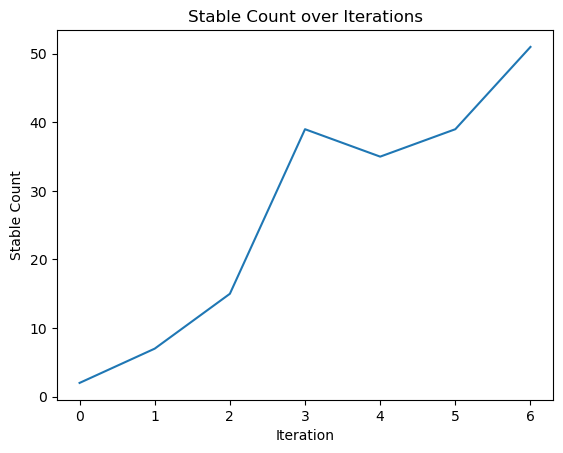

In [113]:
previous = []
unstable_flag = False
initial = True
patience_value = 2
stable_count=[]
while unstable_flag == True or initial == True:
    initial = False
    for loop in range(1, 52):
        best_solution_vote1,best_solution_vote2,best_value_vote = optimize_solution(set_patience=patience_value,Print=False)
        if (best_value_vote != previous and loop != 1):
            print('Unstable!')
            patience_value = patience_value + 1
            unstable_flag = True
            break
        previous = best_value_vote
        selected_items = [data['j'][i] for i in range(num_items) if best_solution_vote1[i] == 1]
        print('@',loop,' ',selected_items, best_value_adaptive,'\n')
    if loop == 51:
        unstable_flag = False
    stable_count.append(loop)
plt.plot(stable_count)
plt.xlabel('Iteration')
plt.ylabel('Stable Count')
plt.title('Stable Count over Iterations')
print('Stable Patience Value: ',patience_value)

From this result, we can see that the patience 8 is enough for a solution making the possibility of a mistake solution less than 0.1%(error rate @ 5%).But comparing with the dynamic generation approach, the vote approach doesn't seemed to be a good choice since it doesn't reduce the patience of the solution while duplicates the time of the solution.